<a href="https://colab.research.google.com/github/kapilchauhary/Regress/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
from sklearn.datasets import load_boston

In [99]:
boston_dataset=load_boston()

In [100]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [101]:
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [102]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [103]:
boston=pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [104]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [105]:
#### Target value is missing from the data. Now add it to dataframe.

In [106]:
boston['MEDV']=boston_dataset.target

In [107]:
boston.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


#### Data Preprocessing

In [108]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### EDA

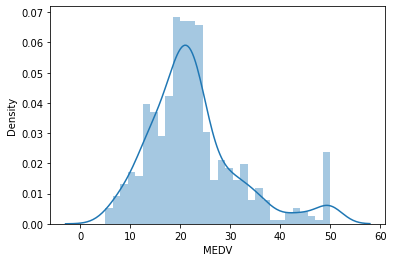

In [109]:
sns.distplot(boston['MEDV'], bins=30)
plt.show()


In [110]:
#### Values of boston['MEDV] are normally distributed with few outliers.

In [111]:
### Draw a correlation matrix to measure the linear relationship between variables

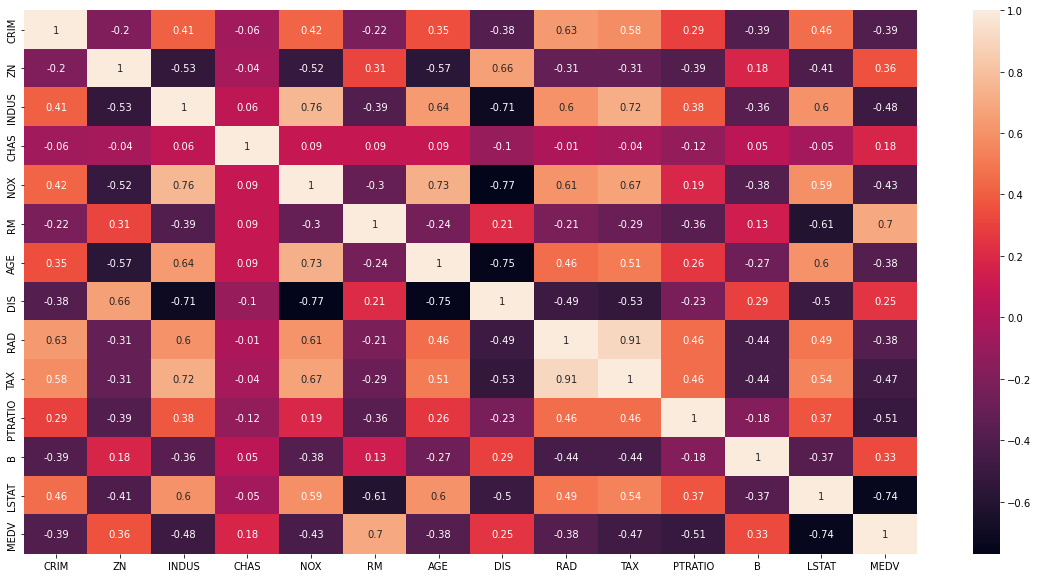

In [112]:
plt.figure(figsize=(20,10))
correlation_matrix = boston.corr().round(2)

sns.heatmap(data=correlation_matrix,annot=True)

#### Correlation Range
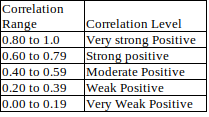

---



'LSTAT' and 'RM' are only two features that are strongly correlated with 'MEDV'

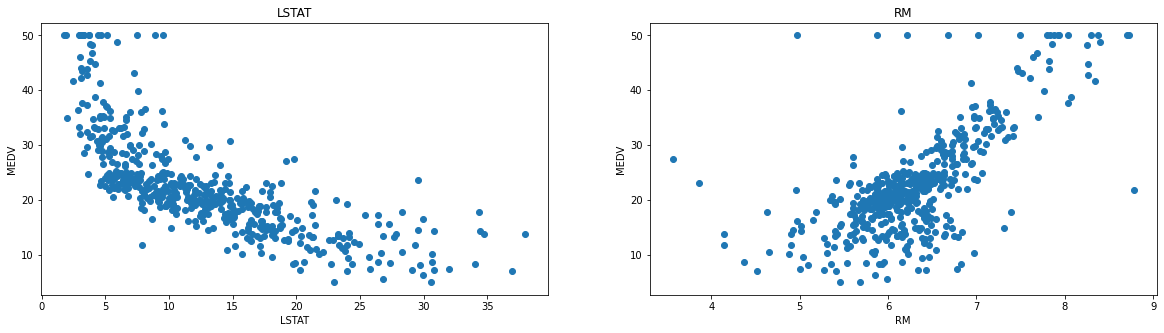

In [113]:
plt.figure(figsize=(20,5))
features = ['LSTAT','RM']
target = boston['MEDV']

for i,col in enumerate(features):
  plt.subplot(1,len(features),i+1)
  x=boston[col]
  y=target
  plt.scatter(x,y,marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('MEDV')

In [114]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

#### Data Split for Training and Testing

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [116]:
#etting random_state a fixed value will guarantee that the same sequence of random numbers is generated each time you run the code.

In [117]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

#### Model Evaluation

In [119]:
y_train_predict = reg.predict(X_train)
rmse=np.sqrt(mean_squared_error(y_train,y_train_predict))
r2=r2_score(y_train,y_train_predict)

y_test_predict = reg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_predict))
r2_test = r2_score(y_test,y_test_predict)

In [120]:
print("Model Perfromance for Training Set \n..................................")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))

print("\n \n")

print("Model Perfromance for Training Set \n..................................")
print("RMSE is {}".format(rmse_test))
print("R2 score is {}".format(r2_test))

Model Perfromance for Training Set 
..................................
RMSE is 5.489677109367875
R2 score is 0.6293490700091449

 

Model Perfromance for Training Set 
..................................
RMSE is 5.704401458190377
R2 score is 0.6631251961250051
